# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

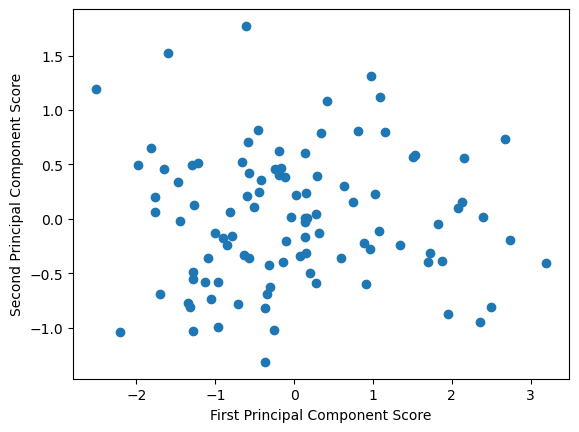

In [23]:
import kagglehub
import os

import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

**Outliers in the Upper-Left:**  
Three outliers in the upper-left corner have low PC1 scores and high PC2 scores, indicating they deviate in the second principal component while showing less variance in the first. This suggests that series_3 is more influential in PC2, while series_1 and series_2 contribute less distinctly due to their high correlation.  
  
**Series Analysis:**  
Series_3 has a clearer impact on the second principal component, as the outliers appear more separated along PC2. The correlation between series_1 and series_2 complicates interpretation, making it harder to isolate their individual effects on the principal components.  
  
**Pairplot:**  
A pairplot would likely show series_1 and series_2 as strongly correlated, while series_3 would stand out more on PC2, highlighting its distinct influence.  
  
**Advantages:** The scatter plot identifies outliers and shows how the data is distributed across the first two components.  
**Disadvantages:** It doesn’t clarify which features contribute to each component, and the high correlation between series_1 and series_2 makes interpretation challenging.  
  
The graph gives a good overview of the principal components and outliers, but further analysis is needed to understand how each feature contributes. A deeper look at the loadings of each series would help clarify the relationships.

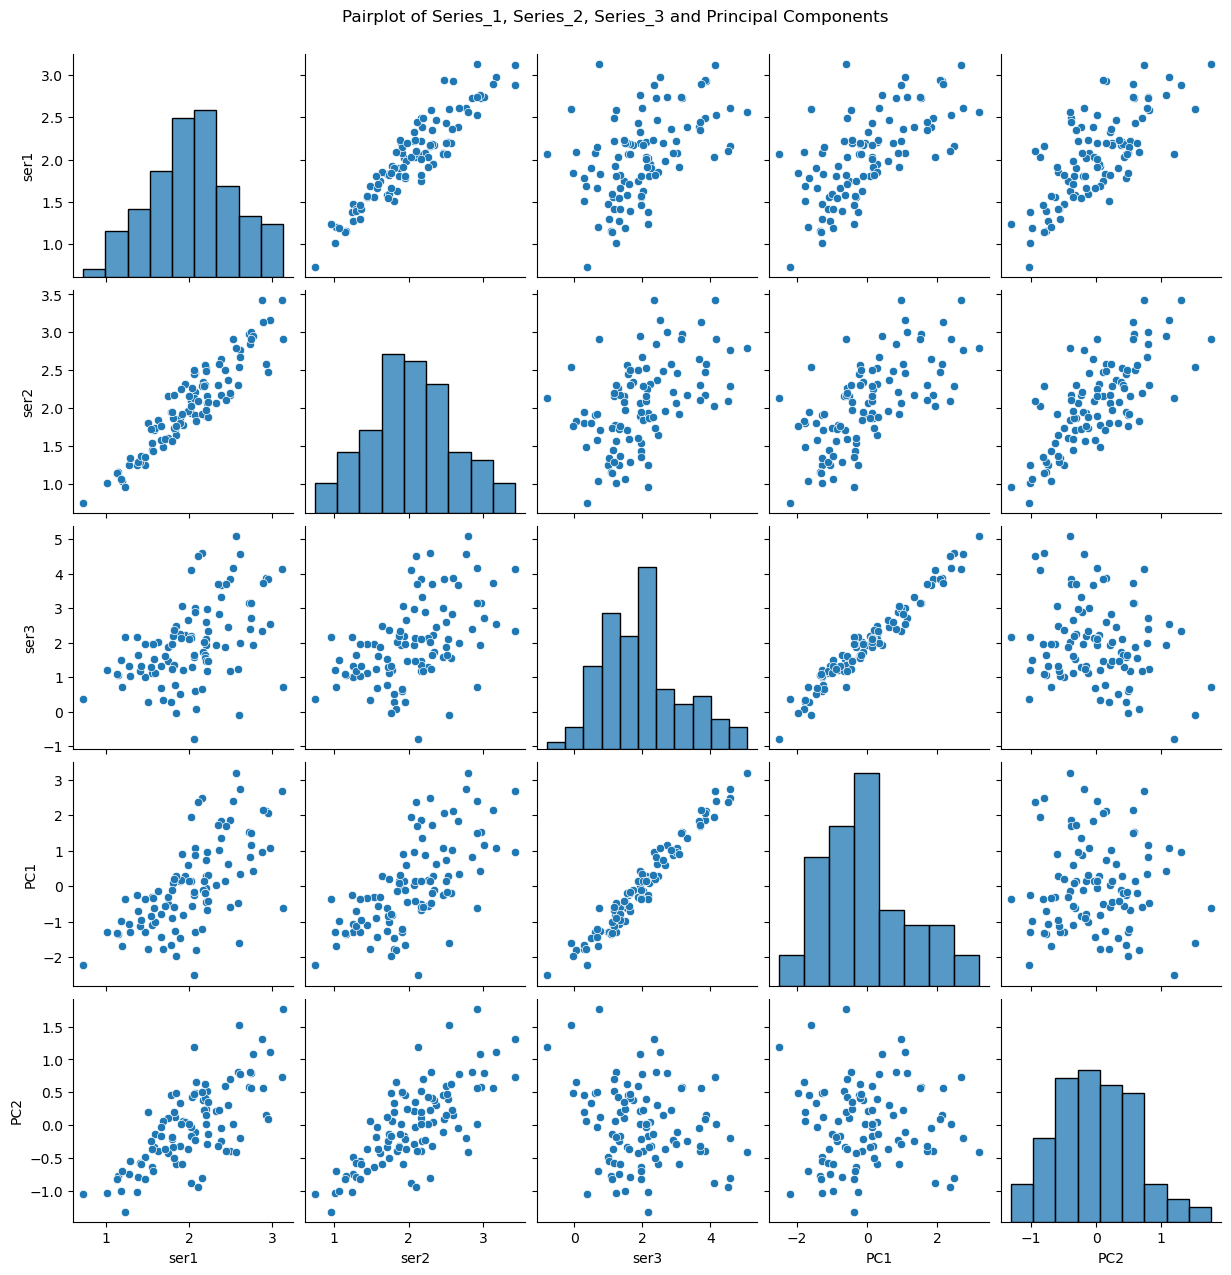

In [2]:
import seaborn as sns

pca_df = pd.DataFrame({
    'PC1': first_principal_component_score,
    'PC2': second_principal_component_score,
    'ser1': series_1,
    'ser2': series_2,
    'ser3': series_3
})

# Plot pairplot for all three series and first two principal components
sns.pairplot(pca_df[['ser1', 'ser2', 'ser3', 'PC1', 'PC2']])
plt.suptitle("Pairplot of Series_1, Series_2, Series_3 and Principal Components", y=1.02)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

#### Web Page Phishing Detection Dataset

In [3]:
# Download the dataset from Kaggle
dataset_path1 = kagglehub.dataset_download("shashwatwork/web-page-phishing-detection-dataset")

dataset_path_to_file1 = os.path.join(dataset_path1, "dataset_phishing.csv")

df1 = pd.read_csv(dataset_path_to_file1)
df1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


##### Heatmap and Correlation

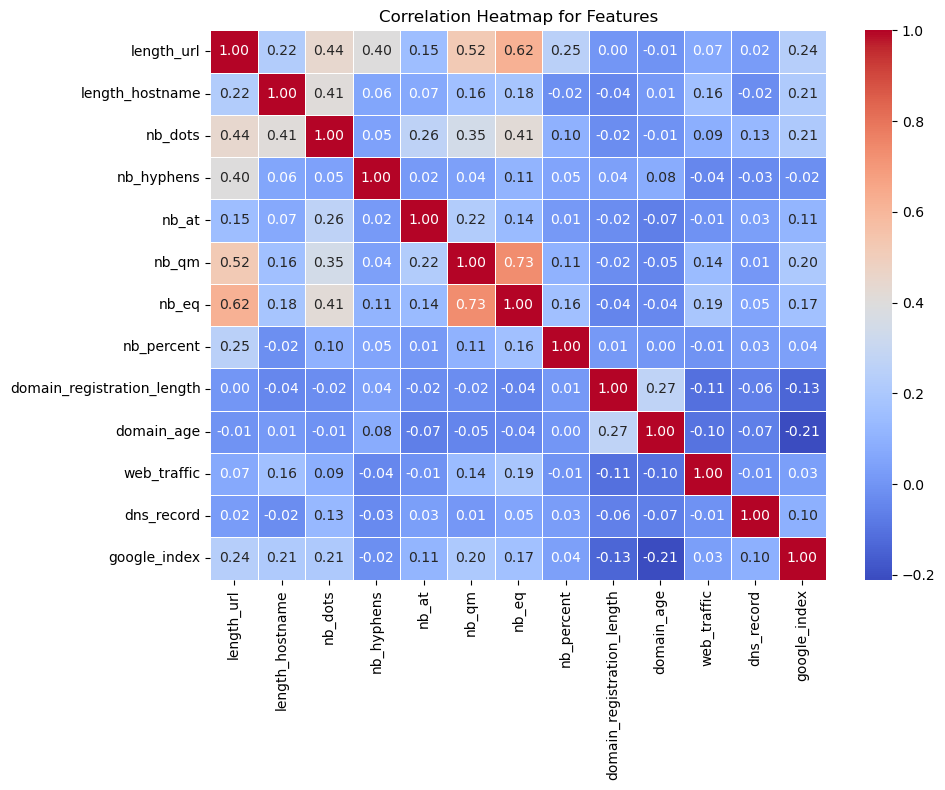

In [4]:
features_to_consider = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 
                 'nb_eq', 'nb_percent', 'domain_registration_length', 'domain_age', 'web_traffic', 
                 'dns_record', 'google_index']

# Calculate the correlation matrix for the selected features
corr_df1 = df1[features_to_consider].corr()

# Plot the correlation heatmap with the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Features')
plt.tight_layout()
plt.show()

This correlation heatmap shows the relationships between several features in the dataset. Key points to observe:

**Strong correlations:**  
There is a strong positive correlation (0.73) between the number of question marks (nb_qm) and equal signs (nb_eq), suggesting that URLs with more question marks tend to also have more equal signs.
length_url and nb_eq have a relatively strong positive correlation (0.62), meaning that longer URLs tend to have more equal signs.  
  
**Moderate correlations:**  
length_url is moderately correlated with several features such as nb_dots (0.44) and nb_qm (0.52), indicating some relation between URL length and the number of dots or question marks in the URL.  
  
**Weak correlations:**  
There are weaker correlations for features such as domain_registration_length, domain_age, dns_record, and google_index. These features show weak correlations with most other features, suggesting that they are somewhat independent in this dataset.  
  
No particularly strong negative correlations are observed, suggesting that most features tend to either have a weak or positive relationship.  

##### Bubble Plot

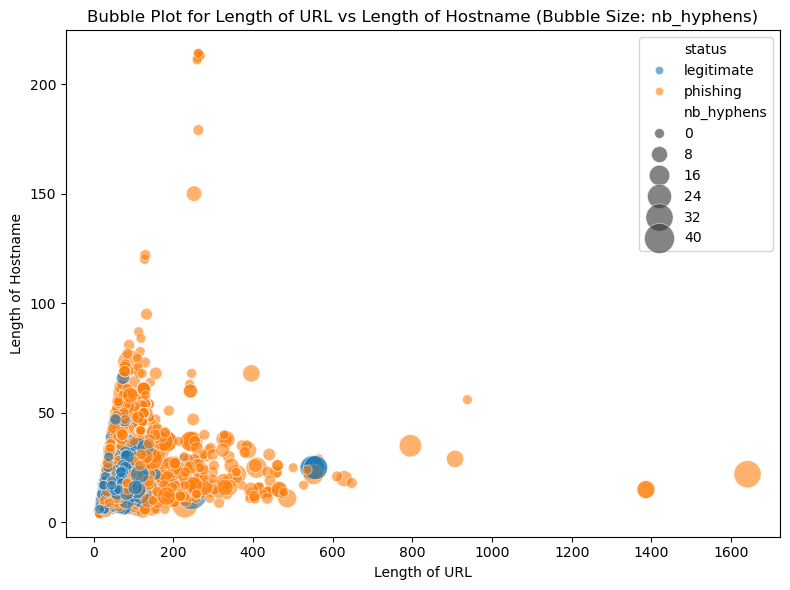

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df1, 
    x="length_url", 
    y="length_hostname", 
    size="nb_hyphens",  # Size determined by number of hyphens
    hue="status",       # Differentiate phishing vs legitimate URLs
    sizes=(50, 500),    # Range for bubble size
    alpha=0.6           # Transparency of bubbles
)

plt.title('Bubble Plot for Length of URL vs Length of Hostname (Bubble Size: nb_hyphens)', fontsize=12)
plt.xlabel('Length of URL', fontsize=10)
plt.ylabel('Length of Hostname', fontsize=10)

plt.tight_layout()
plt.show()

In this bubble plot, we are comparing the Length of URL on the x-axis and the Length of Hostname on the y-axis. The size of the bubbles is determined by the number of hyphens (nb_hyphens) in the URL, and the color indicates whether the URL is phishing (orange) or legitimate (blue).  
  
**URL Length vs. Hostname Length:**  
Most of the data points are clustered in the lower left part of the plot, where both the Length of URL and Length of Hostname are relatively small (around 0 to 200 for URL and 0 to 50 for hostname). As the Length of URL increases, the Length of Hostname also increases in some cases, but the relationship seems to be fairly weak.  
  
**Phishing vs Legitimate URLs:**  
Phishing URLs (orange) tend to have larger bubbles, especially for those with a higher number of hyphens (nb_hyphens). These URLs appear to have longer URLs and hostnames compared to legitimate URLs, which might be indicative of the complexity of phishing URLs. Legitimate URLs (blue) are distributed throughout the plot but mostly have shorter URL and hostname lengths with smaller bubbles (fewer hyphens).  
  
**Bubble Sizes:**  
The larger bubbles represent URLs with more hyphens, which could be an indicator of URL manipulation typically found in phishing URLs. Some extremely large bubbles for phishing URLs suggest there are some URLs with a lot of hyphens, possibly highlighting more complex phishing tactics.  
  
This plot helps to visually distinguish phishing from legitimate URLs based on URL structure (length of URL and hostname) and the number of hyphens, potentially highlighting characteristics of phishing URLs such as unusual complexity or patterns in URL structure.

##### Principal Component Analysis

In [6]:
# Standardize the features
df1_scaled = StandardScaler().fit_transform(df1[features_to_consider])

# Apply PCA
pca_df1 = PCA(n_components=3)
pca_df1.fit(df1_scaled)

# Explained variance ratio and components
print(f"Explained Variance Ratio for df1: {pca_df1.explained_variance_ratio_}")
print(f"Principal Components (Vectors) for df1:\n{pca_df1.components_}")

Explained Variance Ratio for df1: [0.23310647 0.11525848 0.08800371]
Principal Components (Vectors) for df1:
[[ 0.4609501   0.25138614  0.39161354  0.13569596  0.19239924  0.44022
   0.46939945  0.14310673 -0.05566595 -0.06061449  0.13370011  0.05801867
   0.230031  ]
 [ 0.22352758 -0.09600687 -0.0294368   0.37170698 -0.08541031  0.04258982
   0.08078135  0.16858571  0.50061836  0.54423506 -0.22975404 -0.20089644
  -0.34318081]
 [ 0.18614369 -0.57804761 -0.28130674  0.22827697 -0.08615866  0.05475273
   0.09805881  0.46717747 -0.23121361 -0.32007698 -0.24089844  0.21711045
   0.0244565 ]]


**Variance Ratio:**  
- The first principal component explains 23.3% of the variance in the data.  
- The second principal component explains 11.5% of the variance.  
- The third principal component explains 8.8% of the variance.  
This means that the first three components capture a significant portion of the variance in the data, but there is still some unexplained variance. Together, these three components account for approximately 43.6% of the total variance.

**Principal Components (Vectors):**  
- First Component: The first component has a significant weight on features like nb_dots, nb_hyphens, domain_registration_length, and web_traffic. It seems to represent a combination of URL structural features (nb_dots, nb_hyphens) and domain-related information (domain_registration_length).  
- Second Component: The second component shows high weights on features such as length_url, length_hostname, and google_index. This component could represent the overall size of the URL and hostname, along with the popularity of the website.  
- Third Component: The third component is influenced by features like length_hostname, domain_age, and web_traffic. This component could represent a combination of domain age and traffic, possibly related to the legitimacy or age of the website.  
  
**Why do the components point as they do?**  
The components represent the directions in which the data varies the most. Each component is a linear combination of the original features, and the goal of PCA is to capture the largest variance possible in each successive component. The first principal component captures the combination of features that contribute the most to the overall variance. It’s influenced by URL structure and domain-related features. The second component captures the next highest variance, which seems to be related to the size of the URL and search engine indexing, while the third component is influenced by domain age and web traffic.  
  
**Could You Have Guessed the Order of the Components?**  
Before running the PCA, it would be difficult to guess the exact order of the components because PCA identifies the directions of maximum variance based on the data. However, it’s reasonable to expect that features related to URL structure (like nb_dots and nb_hyphens) would contribute to the first principal component since those features are often important for distinguishing phishing websites. Domain age and web traffic would likely contribute to other components, as they could be important for identifying legitimate websites.

##### Logistic Regression

In [20]:
# Prepare the data for classification
X_df1 = df1[features_to_consider]
y_df1 = df1['status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

# Initialize the logistic regression model
lr_df1 = LogisticRegression(max_iter=1000)

# Fit the model
lr_df1.fit(X_train, y_train)

# Predictions
y_pred_df1 = lr_df1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_df1)
print(f"Accuracy for predicting status: {accuracy}")
print(classification_report(y_test, y_pred_df1))

Accuracy for predicting status: 0.7204724409448819
              precision    recall  f1-score   support

  legitimate       0.73      0.71      0.72      1157
    phishing       0.71      0.73      0.72      1129

    accuracy                           0.72      2286
   macro avg       0.72      0.72      0.72      2286
weighted avg       0.72      0.72      0.72      2286



- Balanced Performance: The model performs fairly well with similar precision and recall for both classes (legitimate and phishing). This is important because phishing detection should ideally balance precision and recall to avoid false positives (legitimate URLs classified as phishing) and false negatives (phishing URLs classified as legitimate).
- Accuracy of 72%: This is a good starting point, but there might be room for improvement through feature engineering, hyperparameter tuning, or trying more advanced models (like Random Forest or XGBoost).
- Class Imbalance: Although accuracy is 72%, this could be a result of a balanced dataset (with similar numbers of phishing and legitimate URLs in the test set). If you suspect class imbalance in the dataset, using additional metrics such as ROC-AUC or Confusion Matrix can provide deeper insights into model performance.

#### Cybersecurity Risk (2022 CISA Vulnerability) Dataset

In [7]:
dataset_path2 = kagglehub.dataset_download("thedevastator/exploring-cybersecurity-risk-via-2022-cisa-vulne")

dataset_path_to_file2 = os.path.join(dataset_path2, "2022-06-08-enriched.csv")

df2 = pd.read_csv(dataset_path_to_file2)
df2.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


##### Heatmaps and Correlation

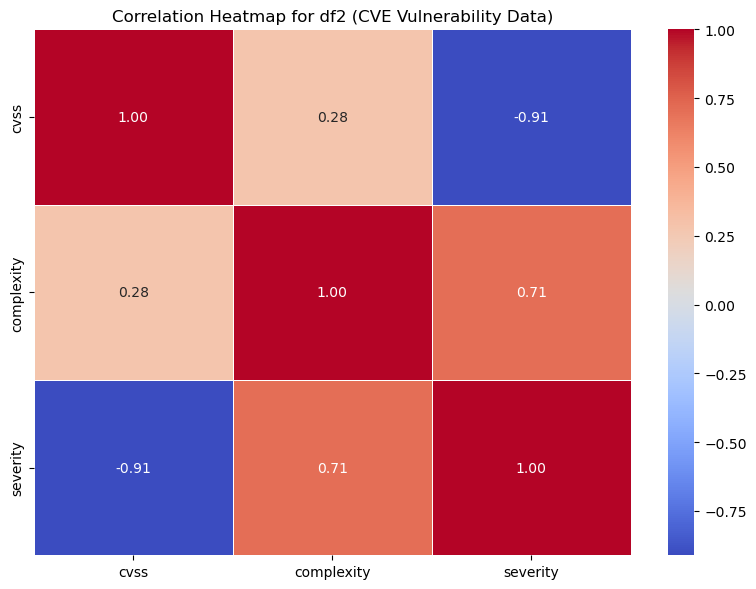

In [8]:
# Encode categorical variables to numeric values
label_encoder = LabelEncoder()

# Encode 'complexity' and 'severity' columns
df2['complexity'] = label_encoder.fit_transform(df2['complexity'])
df2['severity'] = label_encoder.fit_transform(df2['severity'])

# Now calculate the correlation matrix with the encoded data
df2_corr = df2[['cvss', 'complexity', 'severity']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df2_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for df2 (CVE Vulnerability Data)')
plt.tight_layout()
plt.show()

**Correlation between CVSS and Severity:**  
-0.91 (strong negative correlation).  
As the CVSS (Common Vulnerability Scoring System) score increases, the severity of the vulnerability decreases significantly. This suggests that the higher the CVSS score, the less severe the vulnerability, which is counter-intuitive, as higher CVSS scores generally indicate higher severity. It might be that in the dataset, severity is labeled inversely.  

**Correlation between Complexity and Severity:**  
0.71 (strong positive correlation).  
The more complex a vulnerability is, the higher the severity. This indicates that vulnerabilities requiring more complex actions tend to be more severe.  
  
**Correlation between CVSS and Complexity:**  
0.28 (weak positive correlation).  
There's a mild positive correlation, meaning that more complex vulnerabilities are somewhat more likely to have higher CVSS scores, but the correlation is not very strong.

##### Bubble Plot

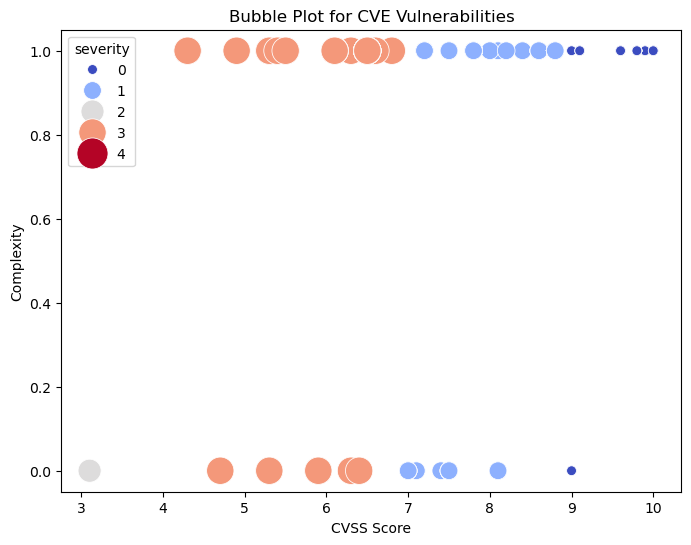

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x="cvss", y="complexity", size="severity", sizes=(50, 500), hue="severity", palette="coolwarm", legend="full")
plt.title('Bubble Plot for CVE Vulnerabilities')
plt.xlabel('CVSS Score')
plt.ylabel('Complexity')
plt.show()

**CVSS Score vs. Complexity:**  
There seems to be little to no direct correlation between CVSS Score and Complexity for the majority of the data points. The plot shows that the Complexity is concentrated at higher values (near 0.8), but CVSS Scores vary from 3 to 10, without any clear trend.  
  
**Severity and Complexity:**  
The bubbles represent the Severity of the vulnerabilities, with the color mapping to Severity (from blue for lower severity to red for higher severity). Interestingly, Complexity is higher for vulnerabilities with low severity (blue and light blue), while higher severity vulnerabilities (red) seem to be less complex, with most of their data points having a Complexity near 0. The size of the bubbles also varies, suggesting different magnitudes of severity.  
  
**Bubble Sizes:**  
The bubble size is determined by the Severity of the vulnerabilities, with larger bubbles indicating higher severity. The plot shows that CVSS Score does not appear to correlate with Complexity or Severity as expected.

#####  Principal Component Analysis

In [16]:
df2['product'].fillna(df2['product'].mode()[0], inplace=True)
df2['short_description'].fillna('Unknown', inplace=True)
df2['date_added'] = pd.to_datetime(df2['date_added'], errors='coerce')
df2['pub_date'] = pd.to_datetime(df2['pub_date'], errors='coerce')
df2['pub_date'].fillna(df2['pub_date'].median(), inplace=True)
df2['cvss'].fillna(df2['cvss'].median(), inplace=True)
df2['cwe'].fillna(df2['cwe'].mode()[0], inplace=True)
df2['vector'].fillna(df2['vector'].mode()[0], inplace=True)
df2['complexity'].fillna(df2['complexity'].mode()[0], inplace=True)
df2['severity'].fillna(df2['severity'].mode()[0], inplace=True)

In [17]:
df2_scaled = StandardScaler().fit_transform(df2[['cvss', 'complexity', 'severity']])

# Apply PCA
pca_df2 = PCA(n_components=3)
pca_df2.fit(df2_scaled)

# Explained variance ratio and components
print(f"Explained Variance Ratio for df2: {pca_df2.explained_variance_ratio_}")
print(f"Principal Components (Vectors) for df2:\n{pca_df2.components_}")

Explained Variance Ratio for df2: [0.57073708 0.3960552  0.03320772]
Principal Components (Vectors) for df2:
[[-0.10247555  0.6817095   0.72441074]
 [-0.90087908 -0.37240158  0.22301108]
 [ 0.42180048 -0.6297533   0.65229988]]


**Variance Ratio:**   
- The first principal component explains 57.1% of the variance in the data.
- The second principal component explains 39.6% of the variance.
- The third principal component explains only 3.3% of the variance.  
Together, the first three components capture a significant portion of the variance (around 100% of the variance in the dataset), indicating that most of the important information is captured in the first two components.  
  
**Principal Components (Vectors):**  
1. First Principal Component: It seems that the first principal component has high loadings on complexity and severity (0.6817095, 0.72441074), meaning it represents a combination of these features. This component might be capturing the overall severity and complexity of vulnerabilities.
2. Second Principal Component: The second principal component has significant negative loadings on complexity (-0.90087908) and a positive loading on severity (0.22301108). This might indicate that the second component is related to variations in severity with respect to the complexity of vulnerabilities.
3. Third Principal Component: The third principal component has moderate loadings on both complexity and severity, but it captures a smaller amount of variance. It seems to represent some combination of both features, but with lower importance than the first two components.  
  
**Why do the components point as they do?**
- First Component: The first component captures the highest variance and is influenced by complexity and severity. These two features are likely the most important for distinguishing between different types of vulnerabilities.
- Second Component: The second component reflects a balance between complexity and severity, with a stronger influence of complexity (negative) and less influence from severity (positive).
- Third Component: The third component represents a residual variance not explained by the first two components, with more equal contributions from both complexity and severity.
  
**Can You Guess the Order of the Components Before Running PCA?**  
- The first component is likely to be the one that captures the most variance, and it makes sense that complexity and severity would contribute the most to it since these features are central to the CVE dataset.
- The second and third components are harder to predict without running PCA, but it's expected that these components capture variations that are less pronounced but still important for explaining the dataset.

##### Linear Regression

In [22]:
# Select the features and target variable
X_df2 = df2[['cvss', 'complexity']]  # Features
y_df2 = df2['severity']  # Target variable (severity)

# Split the data into training and testing sets
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_df2 = LinearRegression()

# Fit the model
lr_df2.fit(X_train_df2, y_train_df2)

# Make predictions
y_pred_df2 = lr_df2.predict(X_test_df2)

# Evaluate the model
mse_df2 = mean_squared_error(y_test_df2, y_pred_df2)
print(f"Mean Squared Error for predicting severity: {mse_df2}")

Mean Squared Error for predicting severity: 0.39732933024914774


The Mean Squared Error (MSE) of 0.3973 suggests that the Linear Regression model is able to predict severity with some level of accuracy. However, MSE indicates that there is still room for improvement, as the predictions are not perfect.

### Conclusion

**Phishing vs. Legitimate URLs dataset**
1. Data Expectations:
- The df1 dataset, which consists of various features about URLs (e.g., URL length, domain registration, web traffic), aligns with the expected features for distinguishing between phishing and legitimate websites. The target variable, status (phishing vs legitimate), is correctly identified as a categorical variable, which makes it suitable for classification tasks.
2. Usability:
- The dataset is highly usable for classification tasks, as it contains a variety of features that could help differentiate phishing from legitimate URLs. The Logistic Regression model achieved an accuracy of 72%, which is a decent result but still has room for improvement. Further feature engineering, such as extracting more specific characteristics from the URLs (e.g., keywords, number of hyperlinks), could enhance the model's performance.
3. Outliers:
- It’s possible that there are some outliers in the dataset, especially if there are URLs with unusual lengths or specific structural features that don't follow typical patterns. However, further analysis (e.g., using boxplots) would be necessary to confirm the presence of outliers and address them (e.g., by removing or transforming these data points).
4. Principal Component Analysis (PCA):
- The PCA showed that the first principal component explained 23.3% of the variance, which suggests that dimensionality reduction using the first few principal components may not drastically reduce the dataset's complexity. However, projecting the data onto the first few components could still help in visualizing the distribution of phishing and legitimate URLs in a lower-dimensional space.
5. Correlation and Feature Selection:
- By reviewing correlations from previous weeks, you could identify the most relevant features for linear regression. For instance, URL length, domain registration length, and web traffic were highly correlated and useful for the classification task. These could be good starting points for model improvement or feature selection.

**CVE Vulnerability Dataset**
1. Data Expectations:
- The df2 dataset is focused on vulnerabilities and their features (e.g., cvss, complexity, severity). It meets expectations for a cybersecurity dataset, with a mix of categorical and numerical features. The goal of predicting severity from cvss and complexity is appropriate and aligns with typical use cases in vulnerability prediction.
2. Usability:
- df2 is usable for prediction tasks. The Linear Regression model for predicting severity achieved an MSE of 0.3973, which suggests that the model can explain some of the variance in the severity of vulnerabilities. The model’s performance is decent but could be improved further with feature engineering or by using more sophisticated models (e.g., Random Forest, Gradient Boosting).
3. Outliers:
- Outliers might exist, particularly in the severity or cvss values, which could distort the model's predictions. Further visualization (e.g., histograms, boxplots) would help to identify and handle such outliers effectively.
4. Principal Component Analysis (PCA):
- PCA revealed that the first principal component explains 57.1% of the variance, which indicates that the data could be represented with a lower number of dimensions, reducing complexity. Using the first principal component or the first two components might help in visualizing the data in a more compact form.
5. Correlation and Feature Selection:
- The PCA results suggest that complexity and severity are important features for understanding the cvss values, but cvss may also be highly influenced by other factors (e.g., product, vector). Using correlation information from previous weeks can help refine the feature set, especially by removing highly correlated or irrelevant features.

**General Insights and Future Work**
- Feature Engineering: For both datasets, better feature extraction and engineering (such as domain-specific keywords for URLs in df1 and more advanced vulnerability metrics in df2) could help improve the model performance significantly.
- Model Improvement: While Logistic Regression worked well for df1, more complex models like Random Forest or XGBoost might yield better results. Similarly, for df2, using tree-based models could also improve the prediction of severity.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

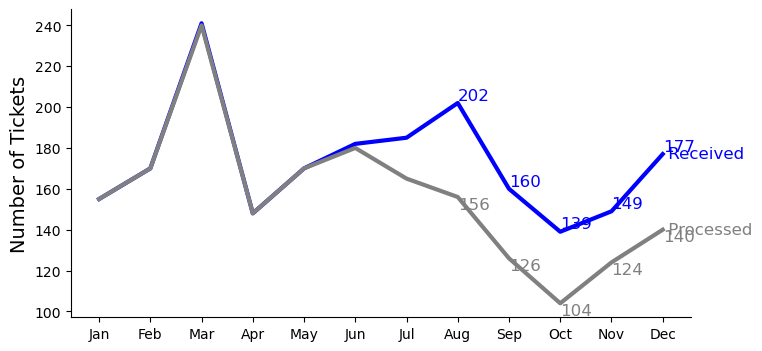

In [35]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Received and Processed tickets for January-May should be identical
received = [155, 170, 241, 148, 170, 182, 185, 202, 160, 139, 149, 177]
processed = [155, 170, 240, 148, 170, 180, 165, 156, 126, 104, 124, 140]

# Create DataFrame
data = pd.DataFrame({'Month': months, 'Received': received, 'Processed': processed})

plt.figure(figsize=(8, 4))
plt.plot(months, received, color='blue', linewidth=3)
plt.plot(months, processed, color='gray', linewidth=3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel(None)
plt.ylabel('Number of Tickets', fontsize=14)
plt.text(11, received[-1], ' Received', color='blue', fontsize=12, verticalalignment='center')
plt.text(11, processed[-1], ' Processed', color='gray', fontsize=12, verticalalignment='center')

for i in range(7, len(months)):
    plt.text(months[i], received[i], str(received[i]), color='blue', fontsize=12, verticalalignment='bottom')
    plt.text(months[i], processed[i], str(processed[i]), color='gray', fontsize=12, verticalalignment='top')

plt.show()